# <center><b>Reporte - 02:</b> <span style='color:Red'> <b>Synergy Logistics</b> </span> </center>
##### <center>Hecho por: <b>Daniel Omar Morán Carrizal<b> </center>
##### <center> <b>marzo 2022<b> </center>

<p>La Dirección de Synergy Logistics ha solicitado al equipo operativo, realizar una propuesta que permita enfocar las prioridades de la estrategia operativa 2021; para ello, se plantea analizar la viabilidad de 3 opciones de enfoque: rutas de importación y exportación, medio de transporte utilizado y valor total de importaciones y exportaciones.</p>

### <b>1. Rutas de importación y exportación</b>

In [910]:
import pandas as pd
sldb = pd.read_csv("synergy_logistics_database.csv")

Ya habiendo leído el archivo csv, se dividirá el DataFrame en exportaciones e importaciones, de esta manera se podrá trabajar de forma separada con cada uno de ellos.

In [911]:
#Frame general de exportaciones
exports = sldb[sldb['direction'] == 'Exports']

'''-------------------------------------------------------------------------------------'''

#Frame general de importaciones
imports = sldb[sldb['direction'] == 'Imports']

Ahora, se filtrarán las rutas más demandadas tanto para exportaciones como para importaciones. En este apartado se clasificaron acorde al número de repeticiones, además, se obtuvo la cantidad monetaria por cada ruta.

In [912]:
#Frame de exportaciones por rutas (sin repetir)
rutas_export = exports.groupby(['origin','destination','transport_mode'])

#Extracción del numero de exportaciones y la cantidad monetaria de esas exportaciones
top_rutas_exp_amount = rutas_export.sum()['total_value']
top_rutas_exp_values = rutas_export.count()['total_value']

#Concatenación en un solo DataFrame
top_rutas_exp = pd.concat([top_rutas_exp_values,top_rutas_exp_amount],axis=1)
top_rutas_exp.columns = ['total_value','amount']


'''-------------------------------------------------------------------------------------'''

#Frame de importaciones por rutas (sin repetir)
rutas_import = imports.groupby(['origin','destination','transport_mode'])

#Extracción del numero de exportaciones y la cantidad monetaria de esas importaciones
top_rutas_imp_amount = rutas_import.sum()['total_value']
top_rutas_imp_values = rutas_import.count()['total_value']

#Concatenación en un solo DataFrame
top_rutas_imp = pd.concat([top_rutas_imp_values,top_rutas_imp_amount],axis=1)
top_rutas_imp.columns = ['total_value','amount']

Una vez filtradas, las rutas de importaciones y exportaciones se regresó a forma DataFrame, esto con el objetivo de una mejor visualización. Posteriormente se imprime el top 10 de cada apartado.

In [913]:
#Frame de exportaciones dividido por categorías y no en grupo.
top_rutas_exp = top_rutas_exp.reset_index()

#Cambio de nombre para las columnas y filtración del top 10
top_rutas_exp.columns = ['Origin','Destination','Transport Mode','Export Value','Total ($)']
top_rutas_exp = top_rutas_exp.sort_values('Export Value', ascending=False).head(10)

#Suma de dinero generada por las 10 rutas
amount_total_r = round(top_rutas_exp.sum()['Total ($)']/1000000000,2)

print(f'El top 10 de paises con mayores exportaciones genera: {amount_total_r} billones')

'''-------------------------------------------------------------------------------------'''

#Frame de importaciones dividido por categorías y no en grupo.
top_rutas_imp = top_rutas_imp.reset_index()

#Cambio de nombre para las columnas y filtración del top 10
top_rutas_imp.columns = ['Origin','Destination','Transport Mode','Import Value','Total ($)']
top_rutas_imp = top_rutas_imp.sort_values('Import Value', ascending=False).head(10)

#Suma de dinero generada por las 10 rutas
amount_total_r = round(top_rutas_imp.sum()['Total ($)']/1000000000,2)

print(f'El top 10 de paises con mayores importaciones genera: {amount_total_r} billones')


El top 10 de paises con mayores exportaciones genera: 45.06 billones
El top 10 de paises con mayores importaciones genera: 26.15 billones


<span style='color:Yellow'> <b>TOP 10 DE RUTAS DE EXPORTACIONES</b> </span>

In [914]:
#Asignación de númeración al index
top_rutas_exp = top_rutas_exp.reset_index(drop=True)
top_rutas_exp.index += 1
top_rutas_exp

,Origin,Destination,Transport Mode,Export Value,Total ($)
1,South Korea,Vietnam,Sea,497,6877007000
2,USA,Netherlands,Sea,436,1032187000
3,Netherlands,Belgium,Road,374,3230094000
4,China,Mexico,Air,330,12250000000
5,Japan,Brazil,Sea,306,3368155000
6,Germany,France,Road,299,2902214000
7,South Korea,Japan,Sea,279,4594000000
8,Australia,Singapore,Sea,273,493000000
9,Canada,Mexico,Rail,261,8450000000
10,China,Spain,Air,250,1862000000


<span style='color:Orange'> <b>TOP 10 DE RUTAS DE IMPORTACIONES</b> </span>

In [915]:
#Asignación de númeración al index
top_rutas_imp = top_rutas_exp.reset_index(drop=True)
top_rutas_imp.index += 1

top_rutas_imp

,Origin,Destination,Transport Mode,Export Value,Total ($)
1,South Korea,Vietnam,Sea,497,6877007000
2,USA,Netherlands,Sea,436,1032187000
3,Netherlands,Belgium,Road,374,3230094000
4,China,Mexico,Air,330,12250000000
5,Japan,Brazil,Sea,306,3368155000
6,Germany,France,Road,299,2902214000
7,South Korea,Japan,Sea,279,4594000000
8,Australia,Singapore,Sea,273,493000000
9,Canada,Mexico,Rail,261,8450000000
10,China,Spain,Air,250,1862000000


<span style='color:Green'> <b>TOTAL DE IMPORTACIONES Y EXPORTACIONES</b> </span>

In [916]:
#Cálculo del total de dinero ($) y número exp/imp de la base de datos 
total_imp_exp_amount = sldb.sum()['total_value']
total_imp_exp_values = sldb.count()['total_value']

'''---------------------------------------------------------------------'''

#Porcentaje total del numero de exportaciones y cantidad ($) 
ptotal_exp_values = ((top_rutas_exp_values / total_imp_exp_values)*100).sum()
ptotal_exp_amount = ((top_rutas_exp_amount / total_imp_exp_amount)*100).sum()

'''---------------------------------------------------------------------'''

#Porcentaje total del numero de importaciones y cantidad ($)
ptotal_imp_values = ((top_rutas_imp_values / total_imp_exp_values)*100).sum()
ptotal_imp_amount = ((top_rutas_imp_amount / total_imp_exp_amount)*100).sum()


A continuación, en las graficas de pastel se muestra el porcentaje de importaciones y exportaciones, acorde a la cantidad de dinero generado y al número de operaciones realizadas en cada ruta.

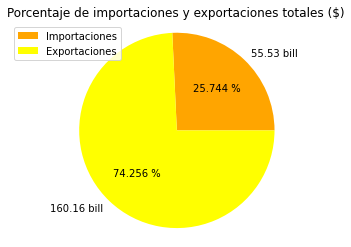

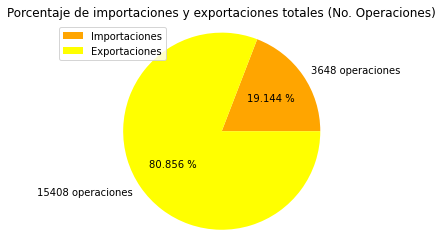

In [917]:
import matplotlib.pyplot as plt

bill_exp = round(top_rutas_exp_amount.sum()/1000000000,2)
bill_imp = round(top_rutas_imp_amount.sum()/1000000000,2)

amount = [ptotal_imp_amount, ptotal_exp_amount]
nombres = [f'{str(bill_imp)} bill', f'{str(bill_exp)} bill']

plt.title("Porcentaje de importaciones y exportaciones totales ($)")
colors = ('orange','yellow')
plt.pie(amount, labels=nombres, autopct= "%0.3f %%", colors = colors)
plt.axis("equal")
plt.legend(labels = ['Importaciones','Exportaciones'], loc = 'best')
plt.show()

'''-----------------------------------------------------------------'''

amount = [ptotal_imp_values, ptotal_exp_values]
nombres = [f'{str(top_rutas_imp_values.sum())} operaciones', f'{str(top_rutas_exp_values.sum())} operaciones']

plt.title("Porcentaje de importaciones y exportaciones totales (No. Operaciones)")
colors = ('orange','yellow')
plt.pie(amount, labels=nombres, autopct= "%0.3f %%", colors = colors)
plt.axis("equal")
plt.legend(labels = ['Importaciones','Exportaciones'], loc = 'best')
plt.show()


### <b>2. Medio de transporte utilizado</b>

A continuación, se ordenará el medio de transporte más utilizado, acorde a la cantidad ($) de las exportaciones y de las importaciones.

In [918]:

#Frame de exportaciones por transporte (sin repetir)
transport_export = exports.groupby(['transport_mode'])

#Extracción de la cantidad monetaria de esas exportaciones por cada transporte
transport_exp_amount = transport_export.sum()['total_value']

#Regresar a formato DataFrame
transport_exp_amount = transport_exp_amount.reset_index()
transport_exp_amount.columns = ['Transport Mode','Total ($)']

#Obtener el valor ($) en billones
transport_exp_amount['Total ($)'] = round(transport_exp_amount['Total ($)']/1000000000,3)

#Ordenar del más utilizado al menos utilizado
transport_exp_amount = transport_exp_amount.sort_values('Total ($)', ascending= False)

#Cambiar el index acorde al lugar
transport_exp_amount = transport_exp_amount.reset_index(drop= True)
transport_exp_amount.index +=1

'-------------------------------------------------------------------------------------------------'

#Frame de importaciones por transporte (sin repetir)
transport_imports = imports.groupby(['transport_mode'])

#Extracción de la cantidad monetaria de esas importaciones por cada transporte
transport_imp_amount = transport_imports.sum()['total_value']

#Regresar a formato DataFrame
transport_imp_amount = transport_imp_amount.reset_index()
transport_imp_amount.columns = ['Transport Mode','Total ($)']

#Obtener el valor ($) en billones
transport_imp_amount['Total ($)'] = round(transport_imp_amount['Total ($)']/1000000000,3)

#Ordenar del más utilizado al menos utilizado
transport_imp_amount = transport_imp_amount.sort_values('Total ($)', ascending= False)

#Cambiar el index acorde al lugar
transport_imp_amount = transport_imp_amount.reset_index(drop= True)
transport_imp_amount.index +=1



<span style='color:Yellow'> <b>MODO DE TRANSPORTE QUE GENERA MÁS INGRESOS EN EXPORTACIONES</b> </span>

In [919]:
transport_exp_amount

,Transport Mode,Total ($)
1,Sea,65.593
2,Rail,34.505
3,Air,32.785
4,Road,27.280


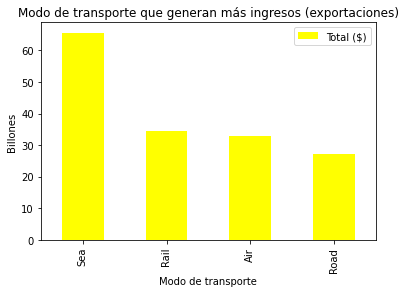

In [920]:
transport_exp_amount.plot(kind='bar', x = 'Transport Mode', y ='Total ($)', color = 'yellow')
plt.title("Modo de transporte que generan más ingresos (exportaciones)")
plt.xlabel("Modo de transporte")
plt.ylabel("Billones")
plt.show()

<span style='color:Orange'> <b>MODO DE TRANSPORTE QUE GENERA MÁS INGRESOS EN IMPORTACIONES</b> </span>

In [921]:
transport_imp_amount

,Transport Mode,Total ($)
1,Sea,34.938
2,Rail,9.123
3,Road,5.990
4,Air,5.477


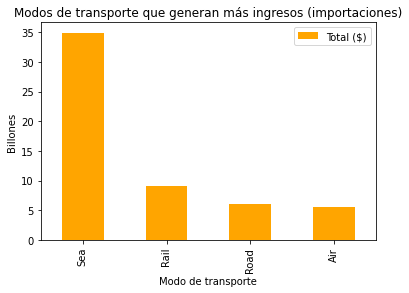

In [922]:
transport_imp_amount.plot(kind='bar', x = 'Transport Mode', y ='Total ($)', color = 'orange', align = 'center')
plt.title("Modos de transporte que generan más ingresos (importaciones)")
plt.xlabel("Modo de transporte")
plt.ylabel("Billones")
plt.show()


### <b>3. Valor total de importaciones y exportaciones</b>

A continuación, se realiza la filtración de los datos de Synergy Logistics para los países que le generan el 80% del valor de las exportaciones e importaciones.

In [923]:
#Frame de exportaciones por país de origen (sin repetir)
country_export = exports.groupby(['origin'])

#Extracción de la cantidad monetaria de esas importaciones por cada país
country_exp_amount = country_export.sum()['total_value']

#Regresar a formato DataFrame
country_exp_amount = country_exp_amount.reset_index()

#Cambio de cifras para expresar las cantidades en billones
country_exp_amount['total_value'] = round(country_exp_amount['total_value']/100000000,3)

#Añadir porcentaje 
total = country_exp_amount['total_value'].sum()
country_exp_amount['percentage'] = round((country_exp_amount['total_value']/total)*100,3)

#Cambiar nombre a las columnas
country_exp_amount.columns = ['Country','Total ($)','Total (%)']

#Ordenar del país que mas genera al que menos genera
country_exp_amount = country_exp_amount.sort_values('Total ($)', ascending= False)

#Obtener porcentaje acumulado
country_exp_amount['Acumm (%)'] = country_exp_amount['Total (%)'].cumsum()

#Cambiar el index acorde al lugar
country_exp_amount = country_exp_amount.reset_index(drop= True)
country_exp_amount.index +=1    

#Imprimir solo los paises que sumen el 80%
country_exp_amount = country_exp_amount[country_exp_amount['Acumm (%)'] <= 83]


'''---------------------------------------------------------------------------'''


#Frame de exportaciones por país de origen (sin repetir)
country_imports = imports.groupby(['origin'])

#Extracción de la cantidad monetaria de esas importaciones por cada país
country_imp_amount = country_imports.sum()['total_value']

#Regresar a formato DataFrame
country_imp_amount = country_imp_amount.reset_index()

#Cambio de cifras para expresar las cantidades en billones
country_imp_amount['total_value'] = round(country_imp_amount['total_value']/100000000,3)

#Añadir porcentaje 
total = country_imp_amount['total_value'].sum()
country_imp_amount['percentage'] = round((country_imp_amount['total_value']/total)*100,3)

#Cambiar nombre a las columnas
country_imp_amount.columns = ['Country','Total ($)','Total (%)']

#Ordenar del país que mas genera al que menos genera
country_imp_amount = country_imp_amount.sort_values('Total ($)', ascending= False)

#Obtener porcentaje acumulado
country_imp_amount['Acumm (%)'] = country_imp_amount['Total (%)'].cumsum()

#Cambiar el index acorde al lugar
country_imp_amount = country_imp_amount.reset_index(drop= True)
country_imp_amount.index +=1    

#Imprimir solo los paises que sumen el 80%
country_imp_amount = country_imp_amount[country_imp_amount['Acumm (%)'] <= 83]

<span style='color:Yellow'> <b>PAISES QUE GENERAN EL 80% DE INGRESOS (EXPORTACIÓN) </b> </span>

In [924]:
country_exp_amount

,Country,Total ($),Total (%),Acumm (%)
1,China,329.770,20.590,20.590
2,France,186.143,11.622,32.212
3,USA,183.553,11.460,43.672
4,South Korea,146.211,9.129,52.801
5,Russia,132.230,8.256,61.057
6,Japan,119.490,7.461,68.518
7,Germany,113.432,7.082,75.600
8,Canada,106.840,6.671,82.271


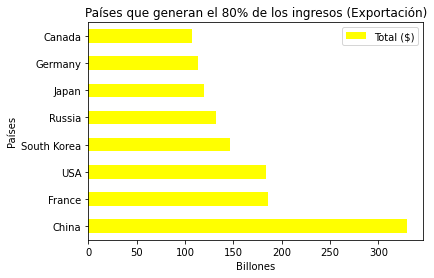

In [925]:
country_exp_amount.plot(kind='barh', x = 'Country', y ='Total ($)', color = 'yellow')
plt.title("Países que generan el 80% de los ingresos (Exportación)")
plt.xlabel("Billones")
plt.ylabel("Países")
plt.show()

<span style='color:Orange'> <b>PAISES QUE GENERAN EL 80% DE INGRESOS (IMPORTACIÓN) </b> </span>

In [926]:
country_imp_amount

,Country,Total ($),Total (%),Acumm (%)
1,China,122.33,22.030,22.030
2,Japan,80.94,14.576,36.606
3,USA,52.91,9.529,46.135
4,Mexico,46.21,8.322,54.457
5,Germany,42.50,7.654,62.111
6,Singapore,40.17,7.234,69.345
7,South Korea,38.89,7.004,76.349
8,Malaysia,35.60,6.411,82.760


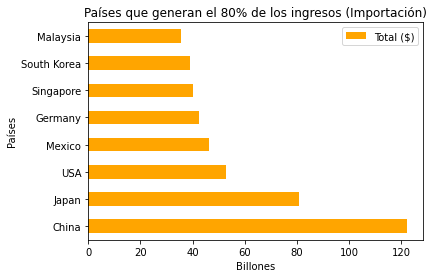

In [927]:
country_imp_amount.plot(kind='barh', x = 'Country', y ='Total ($)', color = 'orange')
plt.title("Países que generan el 80% de los ingresos (Importación)")
plt.xlabel("Billones")
plt.ylabel("Países")
plt.show()

### <b>Estrategia y Conclusiones </b>

<p>Para Synergy Logistics no es conveniente tomar en cuenta la estrategia número 1: "Rutas de importación y exportación", ya que estarían reduciendo sus ingresos notoriamente, ya que el ingreso generado en esas rutas tanto de importación como de exportación es mucho menor de lo que generó un solo país (China, por ejemplo), es por ello que limitar a la empresa a solo 10 rutas no es una buena opción.<br>

Ahora, con respecto al modo de transporte utilizado, tampoco es viable, ya que el ingreso de exportación e importación es mucho menor de lo que generó solamente China, es por ello que liminar a la empresa a realizar operaciones acorde al modo de transporte reduciría considerablemente los ingresos. Esta opción es mucho mejor que la opción anterior, sin embargo, no es suficiente.<br>

<b>Synergy Logistics debe utilizar su opción 3: "Valor total de importaciones y exportaciones", enfocandose en los países que le generan el 80% de ingresos, ya que así podría mejorar considerablemente, porque no habría gastos en países que generan muy poco, además de que la exportación es la actividad que genera mayores ingresos. Debe enfocarse en los países mostrados en las gráficas anteriores, principalmente en China, Francia y USA para exportación y China, Japón y USA para importación. Debe seguir teniendo todas sus modos de transporte, ya que dentro de los paises que generan el 80% se utilizan todas,aunque sobresale el barco como transporte marítimo y el ferrocarril.</b> </p>